In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [2]:
data=pd.read_csv('winequality-red.csv')
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: ylabel='count'>

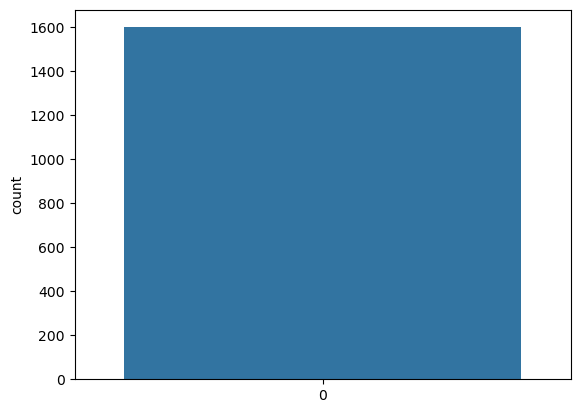

In [45]:
sns.countplot(data['quality'])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [19]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=3)

In [28]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(xtrain,ytrain)
ypred=knn_model.predict(xtest)


C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed

In [29]:
print('\n*****Performance measure for classification" *******\n')
print("\n****************************** "*2)
print("\nAccuracy Score :\t",accuracy_score(ytest,ypred))

print("\n****************************** "*2)
      
print("\nConfusion Matrix:\t",confusion_matrix(ytest,ypred))

print("\n****************************** "*2)

print('\nClassification Report : \t',classification_report(ytest,ypred))



*****Performance measure for classification" *******


****************************** 
****************************** 

Accuracy Score :	 0.509375

****************************** 
****************************** 

Confusion Matrix:	 [[ 0  1  0  1  0  0]
 [ 0  0  4  8  0  0]
 [ 1  9 89 35  4  0]
 [ 0  6 55 64  6  0]
 [ 2  0  8 16 10  0]
 [ 0  0  1  0  0  0]]

****************************** 
****************************** 

Classification Report : 	               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        12
           5       0.57      0.64      0.60       138
           6       0.52      0.49      0.50       131
           7       0.50      0.28      0.36        36
           8       0.00      0.00      0.00         1

    accuracy                           0.51       320
   macro avg       0.26      0.24      0.24       320
weighted avg       0.51      0.51      0.51       320



C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)

C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed

In [32]:
ktrain,ktest,ntrain,ntest=train_test_split(sc_x,y,test_size=0.2,random_state=3)
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(ktrain,ntrain)
npred=knn_model.predict(ktest)
print('\n*****Performance measure for classification" *******\n')
print("\n****************************** "*2)
print("\nAccuracy Score :\t",accuracy_score(ntest,npred))

print("\n****************************** "*2)
      
print("\nConfusion Matrix:\t",confusion_matrix(ntest,npred))

print("\n****************************** "*2)

print('\nClassification Report : \t',classification_report(ntest,npred))



*****Performance measure for classification" *******


****************************** 
****************************** 

Accuracy Score :	 0.628125

****************************** 
****************************** 

Confusion Matrix:	 [[ 0  0  1  1  0  0]
 [ 0  2  5  5  0  0]
 [ 1  4 99 33  1  0]
 [ 0  5 34 84  8  0]
 [ 0  0  5 15 16  0]
 [ 0  0  1  0  0  0]]

****************************** 
****************************** 

Classification Report : 	               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.18      0.17      0.17        12
           5       0.68      0.72      0.70       138
           6       0.61      0.64      0.62       131
           7       0.64      0.44      0.52        36
           8       0.00      0.00      0.00         1

    accuracy                           0.63       320
   macro avg       0.35      0.33      0.34       320
weighted avg       0.62      0.63      0.62       320



C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was pass

In [33]:

print('\n*****Performance measure for classification" *******\n')
print("\n****************************** "*2)
print("\nAccuracy Score :\t",accuracy_score(ntest,npred))

print("\n****************************** "*2)
      
print("\nConfusion Matrix:\t",confusion_matrix(ntest,npred))

print("\n****************************** "*2)

print('\nClassification Report : \t',classification_report(ntest,npred))



*****Performance measure for classification" *******


****************************** 
****************************** 

Accuracy Score :	 0.628125

****************************** 
****************************** 

Confusion Matrix:	 [[ 0  0  1  1  0  0]
 [ 0  2  5  5  0  0]
 [ 1  4 99 33  1  0]
 [ 0  5 34 84  8  0]
 [ 0  0  5 15 16  0]
 [ 0  0  1  0  0  0]]

****************************** 
****************************** 

Classification Report : 	               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.18      0.17      0.17        12
           5       0.68      0.72      0.70       138
           6       0.61      0.64      0.62       131
           7       0.64      0.44      0.52        36
           8       0.00      0.00      0.00         1

    accuracy                           0.63       320
   macro avg       0.35      0.33      0.34       320
weighted avg       0.62      0.63      0.62       320



C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [42]:
l=[3,5,7,9,11]
acc=0
best_k=None
for i in l: 
    knn_model=KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(ktrain,ntrain)
    npred=knn_model.predict(ktest)
    if accuracy_score(ntest,npred)>acc:
        acc=accuracy_score(ntest,npred)
        best_k=i
print("\n*************************************************** "*2)
print("\nTHIS is doing with best of k=",best_k)
print("\n*************************************************** "*2)
print('\n*****Training Data Shape" *******\n')
print("\nTraining data-X- Shape:\t",xtrain.shape)
print("\nTraining data-y- Shape:\t",ytrain. shape)
print('\n***************Testing Data Shape***************\n')
print('\nTesting data (x-Input) Shape:\t',xtest.shape)
print('\nTesting data (y-Outcome) Shape:\t',ytest.shape)
print('\n*****Performance measure for classification" *******\n')
print("\n****************************** "*2)
print("\nAccuracy Score :\t",accuracy_score(ntest,npred))
print("\n****************************** "*2)
print("\nConfusion Matrix:\t",confusion_matrix(ntest,npred))
print("\n****************************** "*2)
print('\nClassification Report : \t',classification_report(ntest,npred))


*************************************************** 
*************************************************** 

THIS is doing with best of k= 3

*************************************************** 
*************************************************** 

*****Training Data Shape" *******


Training data-X- Shape:	 (1279, 11)

Training data-y- Shape:	 (1279, 1)

***************Testing Data Shape***************


Testing data (x-Input) Shape:	 (320, 11)

Testing data (y-Outcome) Shape:	 (320, 1)

*****Performance measure for classification" *******


****************************** 
****************************** 

Accuracy Score :	 0.621875

****************************** 
****************************** 

Confusion Matrix:	 [[  0   0   2   0   0   0]
 [  0   0   8   4   0   0]
 [  0   1 101  35   1   0]
 [  0   0  34  81  16   0]
 [  0   0   1  18  17   0]
 [  0   0   0   1   0   0]]

****************************** 
****************************** 

Classification Report : 	               precis

C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was pass